# Perceptron Model with Iris Dataset


This notebook to train on how to build and train a Perceptron model using the Iris dataset. The Iris dataset is a classic dataset used in machine learning and statistics, consisting of 150 samples of iris flowers with four features each (sepal length, sepal width, petal length, and petal width) and three classes (Iris-setosa, Iris-versicolor, and Iris-virginica).

In this notebook, we will do the following:
* Load and prepare the Iris dataset.
* Split the dataset into training and testing sets.
* Standardize the features.
* Train a Perceptron model.
* Evaluate the model's performance.


# Import libraries

In [24]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix


In [25]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]




# EDA

In [26]:
# Display the first few rows of the dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Split the dataset into training and testing sets

In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Standardize the features

In [28]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize and train the Perceptron model

In [29]:
# Initialize and train the Perceptron model
perceptron = Perceptron(max_iter=1000, eta0=0.1,random_state=42)
perceptron.fit(X_train_scaled, y_train)


Perceptron(eta0=0.1, random_state=42)

# Predict the labels of the test set

In [30]:
# Predict on test set
y_pred = perceptron.predict(X_test_scaled)

# Calculate the accuracy of the model

In [31]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [32]:
# prompt: print accuracy report

from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.65      0.87      0.74        15
           2       1.00      0.53      0.70        15

    accuracy                           0.80        45
   macro avg       0.84      0.80      0.79        45
weighted avg       0.84      0.80      0.79        45



# Display the first few predictions

In [33]:
# Create df to compare predictions with actual labels
results_df = pd.DataFrame({
    'True Label': [target_names[label] for label in y_test],
    'Predicted Label': [target_names[label] for label in y_pred]
})

# Display the first few rows of the DataFrame
print(results_df.head())

   True Label Predicted Label
0   virginica       virginica
1  versicolor      versicolor
2   virginica      versicolor
3  versicolor          setosa
4   virginica      versicolor


In [34]:
# Import the MLPClassifier class
from sklearn.neural_network import MLPClassifier

# Initialize the Multi-layer Perceptron model
mlp = MLPClassifier(hidden_layer_sizes=(10, 10),  # Two hidden layers with 10 neurons each
                    max_iter=1000,  # Number of iterations for training
                    activation='relu',  # Activation function for hidden layers
                    solver='adam',  # Optimization algorithm
                    random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

In [36]:
# Predict on the test set
y_pred = mlp.predict(X_test_scaled)


In [37]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9111111111111111


In [38]:

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.87        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


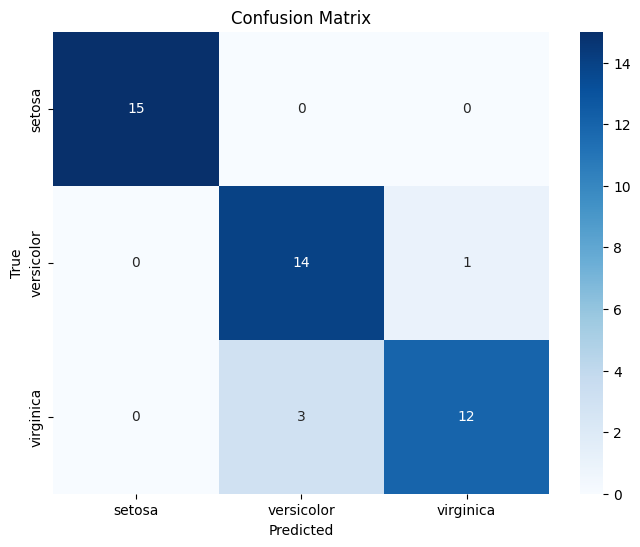

In [39]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
